In [47]:
from IPython.core.display import display
from PIL import Image

import requests
from io import BytesIO

import pandas as pd
import random
import itertools
from tqdm import tqdm_notebook

In [2]:
path_attribute_labels = '/run/media/twoaday/data-storag/data-sets/multi-view-clothing/attribute_labels.json'
path_image_links = '/run/media/twoaday/data-storag/data-sets/multi-view-clothing/image_links.json'
path_mvc_info = '/run/media/twoaday/data-storag/data-sets/multi-view-clothing/mvc_info.json'

In [3]:
df_attribute_labels = pd.read_json(path_attribute_labels)

In [4]:
df_attribute_labels.head()

,AlineDresses,AnimalPrint,Anoraks,Argyle,Asymmetrical,Athletic,BabyDollDresses,BalconetteBras,Bandeau,BandeauBras,...,Zipper,fiftyU,filename,halfZip,hundred1U,hundred2O,hundred2U,itemN,quarter3Zip,quarterZip
0,0,0,0,0,0,0,0,0,0,0,...,0,0,p7258521_s3163710_v0,0,0,0,1,3163710.0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,p7258521_s3163710_v1,0,0,0,1,3163710.0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,p7258521_s3163710_v2,0,0,0,1,3163710.0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,p7258521_s3163710_v3,0,0,0,1,3163710.0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,p7258521_s3163710_v4,0,0,0,1,3163710.0,0,0


In [5]:
for column in  df_attribute_labels.columns:
    print(column)

AlineDresses
AnimalPrint
Anoraks
Argyle
Asymmetrical
Athletic
BabyDollDresses
BalconetteBras
Bandeau
BandeauBras
Banded
Beaded
Beige
Black
Blouses
Blue
BoardShorts
Boatneck
BomberJackets
BootCut
BoxerBriefs
Boxers
BoyShorts
BoyfriendFit
BraletteBras
Bras
Brief
Brocade
Bronze
Brown
Burgundy
BustierDresses
ButtonUpShirts
Buttondown
Buttons
Camis
Camisoles
Camo
Capes
CapriPants
Cardigans
CargoPants
Cashmere
Chains
Chambray
Checkered
CheetahPrint
Chenille
Chevron
Chiffon
Chino
CoatDresses
Coated
Compression
CompressionBras
CompressionPants
ContrastStitching
ConvertibleBras
ConvertiblePants
Coral
Corset
Cotton
CoverUpDresses
CoverUps
Coveralls
Cowl
Crew
Crochet
Cropped
CroppedJackets
Crossback
Crosstraining
Crystals
DemiBras
Denim
DolmanSleeve
Embossed
Embroidered
EmpireDresses
EnhancedBras
FieldJacket
Flannel
Flared
FlatFrontPants
Fleece
FleeceJackets
FloralPrint
Flowers
Fringe
FullCoverageBras
Geometric
Gold
Gown
GraphicPrint
Gray
Green
Halter
HalterDresses
HighLowDresses
HighRise
HighWai

In [6]:
attribute_columns = df_attribute_labels.columns[:-9]
for column in attribute_columns:
    print(column)

AlineDresses
AnimalPrint
Anoraks
Argyle
Asymmetrical
Athletic
BabyDollDresses
BalconetteBras
Bandeau
BandeauBras
Banded
Beaded
Beige
Black
Blouses
Blue
BoardShorts
Boatneck
BomberJackets
BootCut
BoxerBriefs
Boxers
BoyShorts
BoyfriendFit
BraletteBras
Bras
Brief
Brocade
Bronze
Brown
Burgundy
BustierDresses
ButtonUpShirts
Buttondown
Buttons
Camis
Camisoles
Camo
Capes
CapriPants
Cardigans
CargoPants
Cashmere
Chains
Chambray
Checkered
CheetahPrint
Chenille
Chevron
Chiffon
Chino
CoatDresses
Coated
Compression
CompressionBras
CompressionPants
ContrastStitching
ConvertibleBras
ConvertiblePants
Coral
Corset
Cotton
CoverUpDresses
CoverUps
Coveralls
Cowl
Crew
Crochet
Cropped
CroppedJackets
Crossback
Crosstraining
Crystals
DemiBras
Denim
DolmanSleeve
Embossed
Embroidered
EmpireDresses
EnhancedBras
FieldJacket
Flannel
Flared
FlatFrontPants
Fleece
FleeceJackets
FloralPrint
Flowers
Fringe
FullCoverageBras
Geometric
Gold
Gown
GraphicPrint
Gray
Green
Halter
HalterDresses
HighLowDresses
HighRise
HighWai

In [7]:
df_mvc_info = pd.read_json(path_mvc_info)

In [8]:
df_mvc_info.head()

,brandId,brandName,catNum,category,colourId,colourName,image_4x_height,image_4x_width,image_url_2x,image_url_4x,...,productGender,productId,productName,productTypeId,styleId,subCategory1,subCategory2,total_style,viewId,zetaCategory
0,610,"""The North Face""",27563,"""Coats & Outerwear""",239449,Asphalt Grey Heather,2240,1920,http://www.zappos.com/images/z/3/1/6/3/7/1/316...,http://www.zappos.com/images/z/3/1/6/3/7/1/316...,...,"""Mens""",7258521,"""Apex Bionic Jacket""",2,3163710,"""Jackets and Coats""","""Jackets and Coats""",10,0,"{27563: u'Clothing', 27591: u'Coats & Outerwea'}"
1,610,"""The North Face""",27563,"""Coats & Outerwear""",239449,Asphalt Grey Heather,2240,1920,http://www.zappos.com/images/z/3/1/6/3/7/1/316...,http://www.zappos.com/images/z/3/1/6/3/7/1/316...,...,"""Mens""",7258521,"""Apex Bionic Jacket""",2,3163710,"""Jackets and Coats""","""Jackets and Coats""",10,1,"{27563: u'Clothing', 27591: u'Coats & Outerwea'}"
2,610,"""The North Face""",27563,"""Coats & Outerwear""",239449,Asphalt Grey Heather,2240,1920,http://www.zappos.com/images/z/3/1/6/3/7/1/316...,http://www.zappos.com/images/z/3/1/6/3/7/1/316...,...,"""Mens""",7258521,"""Apex Bionic Jacket""",2,3163710,"""Jackets and Coats""","""Jackets and Coats""",10,2,"{27563: u'Clothing', 27591: u'Coats & Outerwea'}"
3,610,"""The North Face""",27563,"""Coats & Outerwear""",239449,Asphalt Grey Heather,2240,1920,http://www.zappos.com/images/z/3/1/6/3/7/1/316...,http://www.zappos.com/images/z/3/1/6/3/7/1/316...,...,"""Mens""",7258521,"""Apex Bionic Jacket""",2,3163710,"""Jackets and Coats""","""Jackets and Coats""",10,3,"{27563: u'Clothing', 27591: u'Coats & Outerwea'}"
4,610,"""The North Face""",27563,"""Coats & Outerwear""",239449,Asphalt Grey Heather,2240,1920,http://www.zappos.com/images/z/3/1/6/3/7/1/316...,http://www.zappos.com/images/z/3/1/6/3/7/1/316...,...,"""Mens""",7258521,"""Apex Bionic Jacket""",2,3163710,"""Jackets and Coats""","""Jackets and Coats""",10,4,"{27563: u'Clothing', 27591: u'Coats & Outerwea'}"


In [9]:
df_mvc_info.columns

Index(['brandId', 'brandName', 'catNum', 'category', 'colourId', 'colourName',
       'image_4x_height', 'image_4x_width', 'image_url_2x', 'image_url_4x',
       'image_url_multiView', 'image_url_thumbnails', 'price', 'productGender',
       'productId', 'productName', 'productTypeId', 'styleId', 'subCategory1',
       'subCategory2', 'total_style', 'viewId', 'zetaCategory'],
      dtype='object')

In [10]:
df_image_links = pd.read_json(path_image_links)

In [11]:
df_image_links.head().image_url_4x.tolist()

['http://www.zappos.com/images/z/3/1/6/3/7/1/3163710-p-4x.jpg',
 'http://www.zappos.com/images/z/3/1/6/3/7/1/3163710-1-4x.jpg',
 'http://www.zappos.com/images/z/3/1/6/3/7/1/3163710-2-4x.jpg',
 'http://www.zappos.com/images/z/3/1/6/3/7/1/3163710-3-4x.jpg',
 'http://www.zappos.com/images/z/3/1/6/3/7/1/3163710-4-4x.jpg']

In [12]:
df_image_links.count()

image_url_4x    161260
dtype: int64

In [13]:
df_mvc_info.groupby('colourName').count().sort_values(by='brandId', ascending=False).head(20)

,brandId,brandName,catNum,category,colourId,image_4x_height,image_4x_width,image_url_2x,image_url_4x,image_url_multiView,...,productGender,productId,productName,productTypeId,styleId,subCategory1,subCategory2,total_style,viewId,zetaCategory
colourName,,,,,,,,,,,,,,,,,,,,,
Black,27818,27818,27818,27818,27818,27818,27818,27818,27818,27818,...,27818,27818,27818,27818,27818,27818,27818,27818,27818,27818
White,5846,5846,5846,5846,5846,5846,5846,5846,5846,5846,...,5846,5846,5846,5846,5846,5846,5846,5846,5846,5846
Navy,2653,2653,2653,2653,2653,2653,2653,2653,2653,2653,...,2653,2653,2653,2653,2653,2653,2653,2653,2653,2653
Multi,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,...,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876
Blue,1749,1749,1749,1749,1749,1749,1749,1749,1749,1749,...,1749,1749,1749,1749,1749,1749,1749,1749,1749,1749
Charcoal,1394,1394,1394,1394,1394,1394,1394,1394,1394,1394,...,1394,1394,1394,1394,1394,1394,1394,1394,1394,1394
Grey,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127,...,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127
Red,1020,1020,1020,1020,1020,1020,1020,1020,1020,1020,...,1020,1020,1020,1020,1020,1020,1020,1020,1020,1020
Heather Grey,915,915,915,915,915,915,915,915,915,915,...,915,915,915,915,915,915,915,915,915,915


In [14]:
df_mvc_info.groupby('category').count()

,brandId,brandName,catNum,colourId,colourName,image_4x_height,image_4x_width,image_url_2x,image_url_4x,image_url_multiView,...,productGender,productId,productName,productTypeId,styleId,subCategory1,subCategory2,total_style,viewId,zetaCategory
category,,,,,,,,,,,,,,,,,,,,,
"""Coats & Outerwear""",29777,29777,29777,29777,29777,29777,29777,29777,29777,29777,...,29777,29777,29777,29777,29777,29777,29777,29777,29777,29777
"""Dresses""",14994,14994,14994,14994,14994,14994,14994,14994,14994,14994,...,14994,14994,14994,14994,14994,14994,14994,14994,14994,14994
"""Jeans""",9913,9913,9913,9913,9913,9913,9913,9913,9913,9913,...,9913,9913,9913,9913,9913,9913,9913,9913,9913,9913
"""Pants""",17336,17336,17336,17336,17336,17336,17336,17336,17336,17336,...,17336,17336,17336,17336,17336,17336,17336,17336,17336,17336
"""Shirts & Tops""",49568,49568,49568,49568,49568,49568,49568,49568,49568,49568,...,49568,49568,49568,49568,49568,49568,49568,49568,49568,49568
"""Sleepwear""",5335,5335,5335,5335,5335,5335,5335,5335,5335,5335,...,5335,5335,5335,5335,5335,5335,5335,5335,5335,5335
"""Sweaters""",9817,9817,9817,9817,9817,9817,9817,9817,9817,9817,...,9817,9817,9817,9817,9817,9817,9817,9817,9817,9817
"""Swimwear""",9787,9787,9787,9787,9787,9787,9787,9787,9787,9787,...,9787,9787,9787,9787,9787,9787,9787,9787,9787,9787
"""Underwear & Intimates""",12560,12560,12560,12560,12560,12560,12560,12560,12560,12560,...,12560,12560,12560,12560,12560,12560,12560,12560,12560,12560


In [15]:
df_mvc_info.groupby('productGender').count()

,brandId,brandName,catNum,category,colourId,colourName,image_4x_height,image_4x_width,image_url_2x,image_url_4x,...,price,productId,productName,productTypeId,styleId,subCategory1,subCategory2,total_style,viewId,zetaCategory
productGender,,,,,,,,,,,,,,,,,,,,,
"""Mens""",56776,56776,56776,56776,56776,56776,56776,56776,56776,56776,...,56776,56776,56776,56776,56776,56776,56776,56776,56776,56776
"""Unisex""",66,66,66,66,66,66,66,66,66,66,...,66,66,66,66,66,66,66,66,66,66
"""Womens""",104418,104418,104418,104418,104418,104418,104418,104418,104418,104418,...,104418,104418,104418,104418,104418,104418,104418,104418,104418,104418


In [16]:
df_mvc_info.groupby('subCategory2').count()

,brandId,brandName,catNum,category,colourId,colourName,image_4x_height,image_4x_width,image_url_2x,image_url_4x,...,price,productGender,productId,productName,productTypeId,styleId,subCategory1,total_style,viewId,zetaCategory
subCategory2,,,,,,,,,,,,,,,,,,,,,
"""Dresses""",15787,15787,15787,15787,15787,15787,15787,15787,15787,15787,...,15787,15787,15787,15787,15787,15787,15787,15787,15787,15787
"""Jackets and Coats""",29762,29762,29762,29762,29762,29762,29762,29762,29762,29762,...,29762,29762,29762,29762,29762,29762,29762,29762,29762,29762
"""Jeans""",9930,9930,9930,9930,9930,9930,9930,9930,9930,9930,...,9930,9930,9930,9930,9930,9930,9930,9930,9930,9930
"""Legwear""",773,773,773,773,773,773,773,773,773,773,...,773,773,773,773,773,773,773,773,773,773
"""Long Sleeve Tops""",36381,36381,36381,36381,36381,36381,36381,36381,36381,36381,...,36381,36381,36381,36381,36381,36381,36381,36381,36381,36381
"""Night Gowns""",918,918,918,918,918,918,918,918,918,918,...,918,918,918,918,918,918,918,918,918,918
"""One Piece Swim Suits""",1431,1431,1431,1431,1431,1431,1431,1431,1431,1431,...,1431,1431,1431,1431,1431,1431,1431,1431,1431,1431
"""Pants""",17317,17317,17317,17317,17317,17317,17317,17317,17317,17317,...,17317,17317,17317,17317,17317,17317,17317,17317,17317,17317
"""Robes""",814,814,814,814,814,814,814,814,814,814,...,814,814,814,814,814,814,814,814,814,814


In [17]:
df_mvc_info.columns

Index(['brandId', 'brandName', 'catNum', 'category', 'colourId', 'colourName',
       'image_4x_height', 'image_4x_width', 'image_url_2x', 'image_url_4x',
       'image_url_multiView', 'image_url_thumbnails', 'price', 'productGender',
       'productId', 'productName', 'productTypeId', 'styleId', 'subCategory1',
       'subCategory2', 'total_style', 'viewId', 'zetaCategory'],
      dtype='object')

In [18]:
df_mvc_info.groupby('styleId').count().head()

,brandId,brandName,catNum,category,colourId,colourName,image_4x_height,image_4x_width,image_url_2x,image_url_4x,...,price,productGender,productId,productName,productTypeId,subCategory1,subCategory2,total_style,viewId,zetaCategory
styleId,,,,,,,,,,,,,,,,,,,,,
79868,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
330703,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
330704,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
330705,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
330706,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [19]:
df_mvc_info.loc[df_mvc_info.styleId == 79868]

,brandId,brandName,catNum,category,colourId,colourName,image_4x_height,image_4x_width,image_url_2x,image_url_4x,...,productGender,productId,productName,productTypeId,styleId,subCategory1,subCategory2,total_style,viewId,zetaCategory
103,613,"""Capezio""",27563,"""Underwear & Intimates""",3,Black,2240,1920,http://www.zappos.com/images/z/7/9/8/79868-p-2...,http://www.zappos.com/images/z/7/9/8/79868-p-4...,...,"""Womens""",7136484,"""Women\'s Fishnet Tight""",5,79868,"""Legwear""","""Legwear""",1,0,"{27563: u'Clothing', 27605: u'Hosier', 27590: ..."
104,613,"""Capezio""",27563,"""Underwear & Intimates""",3,Black,2240,1920,http://www.zappos.com/images/z/7/9/8/79868-1-2...,http://www.zappos.com/images/z/7/9/8/79868-1-4...,...,"""Womens""",7136484,"""Women\'s Fishnet Tight""",5,79868,"""Legwear""","""Legwear""",1,1,"{27563: u'Clothing', 27605: u'Hosier', 27590: ..."
105,613,"""Capezio""",27563,"""Underwear & Intimates""",3,Black,2240,1920,http://www.zappos.com/images/z/7/9/8/79868-2-2...,http://www.zappos.com/images/z/7/9/8/79868-2-4...,...,"""Womens""",7136484,"""Women\'s Fishnet Tight""",5,79868,"""Legwear""","""Legwear""",1,2,"{27563: u'Clothing', 27605: u'Hosier', 27590: ..."
106,613,"""Capezio""",27563,"""Underwear & Intimates""",3,Black,2240,1920,http://www.zappos.com/images/z/7/9/8/79868-3-2...,http://www.zappos.com/images/z/7/9/8/79868-3-4...,...,"""Womens""",7136484,"""Women\'s Fishnet Tight""",5,79868,"""Legwear""","""Legwear""",1,3,"{27563: u'Clothing', 27605: u'Hosier', 27590: ..."


In [20]:
df_mvc_info.viewId.unique()

array([0, 1, 2, 3, 4, 5, 7])

In [21]:
product_ids = df_mvc_info.productId.unique()

In [22]:
len(product_ids)

23193

In [55]:
data_set = []
for product_id in tqdm_notebook(product_ids[:50], desc = 'Generating image triplets'):
    try:
        colour_variations = df_mvc_info.loc[df_mvc_info.productId == product_id].colourId.unique().tolist()
        for colour in colour_variations:
            # Find images
            positives = df_mvc_info.loc[df_mvc_info.productId == product_id]
            positives = positives.loc[df_mvc_info.colourId == colour].image_url_2x.tolist()
            df_neg = df_mvc_info.loc[df_mvc_info.colourId == colour]
            for attr in ['subCategory2', 'productGender']:
                df_neg = df_neg.loc[df_neg[attr] == df_mvc_info.loc[df_mvc_info.productId == product_id][attr].tolist()[0]]            
            df_neg = df_neg.loc[df_neg.productId != product_id]
            pairs = list(itertools.combinations(positives, 2))
            df_neg = df_neg.sample(min(len(pairs), len(df_neg))).image_url_2x.tolist()
            if len(pairs) > len(df_neg):
                cat = df_mvc_info.loc[df_mvc_info.productId == product_id].subCategory2.tolist()[0]
                add_df = df_mvc_info.loc[df_mvc_info.productId != product_id].loc[df_mvc_info.subCategory2 == cat]
                add_df = add_df.sample(len(pairs) - len(df_neg)).image_url_2x.tolist()
                df_neg += add_df
            for pair, negative in zip(pairs, df_neg):
                anchor, positive = pair
                data_set.append([anchor, positive, negative])
    except Exception as exp:
        print(exp)

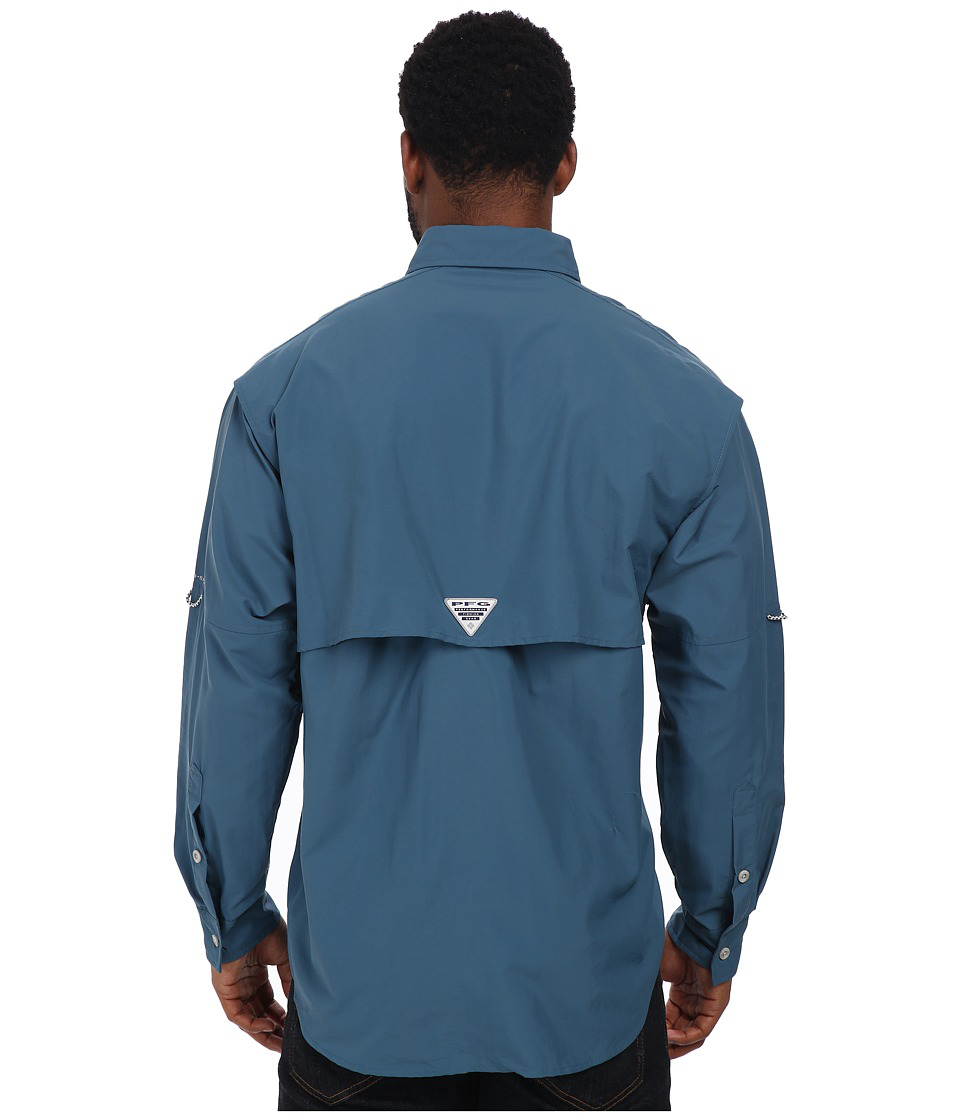

anchor


In [ ]:
for name, url in zip(['anchor', 'positive', 'negative'], random.sample(data_set, 1)[0]):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.resize((64, 64))
    display(img)
    print(name)